### Financial Literacy Project

#### Importing the required Libraries

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import numpy as np
from scipy.stats import chisquare

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

#### Reading the data

In [91]:
data = pd.read_csv("C:/Users/DELL/Documents/Survey.csv")
data.head()

,Timestamp,Email Id,Gender,Age group,Educational Qualification,Currently you are a,Area you belong to,Annual income (Parents/Self),Do you have any loan (Parents / Self) ?,Do you pay your installment on time ?,...,Relation between your income and expenditure habits?,How much percent of knowledge do you have about Insurance which protects your finances and investment?,Do you have any passive income?,Do you think your invested money is well Diversified(Properly distributed)?,Do you have any emergency fund?,How much satisfied you are with your spending habits ?,The first thing you will do in financial emergency?,How much are you aware about risks while investing?,What are your financial goals?,What kind of solution do you think will make people aware about financial literacy?
0,05-10-2022 09:36,bagilgekaromkar@gmail.com,Male,18-30,Undergraduate,Student,Rural,Below 2 Lakhs,No,No,...,Expenditure>Income,20-40%,No passive Income,No,Yes,Satisfied,Use emergency fund (savings),Have heard about it,Others,It should be taught at school level
1,05-10-2022 09:36,swapnilsantras2@gmail.com,Male,31-40,Post Graduate and above,Service/Business (man),Urban,2-5 Lakhs,Yes,Yes,...,Income>Expenditure,60-100%,Gains on investments,Yes,No,Neutral,Use emergency fund (savings),Extremely Aware,Others,It should be taught at school level
2,05-10-2022 09:43,jiteshkedare@gmail.com,Male,18-30,Post Graduate and above,Unemployed,Rural,Below 2 Lakhs,No,No,...,Dont know,40-60%,Rental Income,No,No,Dissatisfied,Others,Aware,Own a luxury item (like Car etc),There should be a proper training course avail...
3,05-10-2022 09:45,"Www, sangeetaagarwal123@gmail.com",Female,18-30,Undergraduate,Student,Urban,5-10 Lakhs,No,No,...,Expenditure>Income,20-40%,No passive Income,Yes,No,Very Satisfied,Dissolution of RD or SIP or FD,Have heard about it,Certain amount in saving,It should be taught at school level
4,05-10-2022 09:45,vasanteewagh12@gmail.com,Female,18-30,Undergraduate,Student,Rural,Below 2 Lakhs,Yes,No,...,Dont know,0-20%,No passive Income,No,No,Neutral,Others,Not Aware,Own a land,It should be taught at school level


#### Missing Value

In [92]:
data.isnull().sum()

Timestamp                                                                                                  0
Email Id                                                                                                  12
Gender                                                                                                     0
Age group                                                                                                  0
Educational Qualification                                                                                  0
Currently you are a                                                                                        0
Area you belong to                                                                                         0
Annual income (Parents/Self)                                                                               0
Do you have any loan (Parents / Self) ?                                                                    0
Do you pay your ins

In [118]:
dataf=data.dropna(axis=1)
dataf.head()

,Timestamp,Gender,Age group,Educational Qualification,Currently you are a,Area you belong to,Annual income (Parents/Self),Do you have any loan (Parents / Self) ?,How do you make your financial Budget?,Do you invest in Stocks or Crypto?,...,Relation between your income and expenditure habits?,How much percent of knowledge do you have about Insurance which protects your finances and investment?,Do you have any passive income?,Do you think your invested money is well Diversified(Properly distributed)?,Do you have any emergency fund?,How much satisfied you are with your spending habits ?,The first thing you will do in financial emergency?,How much are you aware about risks while investing?,What are your financial goals?,What kind of solution do you think will make people aware about financial literacy?
0,05-10-2022 09:36,Male,18-30,Undergraduate,Student,Rural,Below 2 Lakhs,No,Monthly,No,...,Expenditure>Income,20-40%,No passive Income,No,Yes,Satisfied,Use emergency fund (savings),Have heard about it,Others,It should be taught at school level
1,05-10-2022 09:36,Male,31-40,Post Graduate and above,Service/Business (man),Urban,2-5 Lakhs,Yes,Monthly,Yes,...,Income>Expenditure,60-100%,Gains on investments,Yes,No,Neutral,Use emergency fund (savings),Extremely Aware,Others,It should be taught at school level
2,05-10-2022 09:43,Male,18-30,Post Graduate and above,Unemployed,Rural,Below 2 Lakhs,No,No Financial Budget,No,...,Dont know,40-60%,Rental Income,No,No,Dissatisfied,Others,Aware,Own a luxury item (like Car etc),There should be a proper training course avail...
3,05-10-2022 09:45,Female,18-30,Undergraduate,Student,Urban,5-10 Lakhs,No,Monthly,No,...,Expenditure>Income,20-40%,No passive Income,Yes,No,Very Satisfied,Dissolution of RD or SIP or FD,Have heard about it,Certain amount in saving,It should be taught at school level
4,05-10-2022 09:45,Female,18-30,Undergraduate,Student,Rural,Below 2 Lakhs,Yes,No Financial Budget,No,...,Dont know,0-20%,No passive Income,No,No,Neutral,Others,Not Aware,Own a land,It should be taught at school level


In [94]:
data1=dataf.drop("Timestamp",axis=1)

In [95]:
data1.describe()

,Rate yourself for how much you know about the tax you or your parents pay each financial year?
count,169.000000
mean,3.076923
std,1.535299
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [96]:
print(data1.columns)

Index(['Gender', 'Age group', 'Educational Qualification',
       'Currently you are a', 'Area you belong to',
       'Annual income (Parents/Self)',
       'Do you have any loan (Parents / Self) ?',
       'How do you make your financial Budget?',
       'Do you invest in Stocks or Crypto?', 'Do you have monthly RD  or SIP?',
       'Do you know anything about financial literacy (money management)',
       'Have you ever learnt how to manage your money and where?',
       'Do you know interest rate of your bank account?',
       'Do you know inflation rate  ?',
       'Rate yourself for how much you know about the tax you or your parents pay each financial year?',
       'Relation between your income and expenditure habits?',
       'How much percent of knowledge do you have about Insurance which protects your finances and investment?',
       'Do you have any passive income?',
       'Do you think your invested money is well Diversified(Properly distributed)?',
       'Do you have an

#### Encoding the Data(Categorical Variables)

In [97]:
encoding_mapping1 = {'No': 0 ,'Yes': 1}

# Apply the ordinal encoding to the specified column using the replace method
data1['Do you invest in Stocks or Crypto?'].replace(encoding_mapping1, inplace=True)

encoding_mapping2 = {'Dont know':0 ,'No': 1 ,'Yes': 2}

# Apply the ordinal encoding to the specified column using the replace method
data1[ 'Do you have monthly RD  or SIP?'].replace(encoding_mapping2, inplace=True)

encoding_mapping3 = {'No': 0 ,'Yes': 1}

# Apply the ordinal encoding to the specified column using the replace method
data1['Do you know anything about financial literacy (money management)'].replace(encoding_mapping3, inplace=True)

encoding_mapping4 = {'No': 0 ,'Yes': 1}

# Apply the ordinal encoding to the specified column using the replace method
data1['Do you know interest rate of your bank account?'].replace(encoding_mapping4, inplace=True)

encoding_mapping5 = {'Unaware': 0 ,'No': 1 ,'Yes': 2}

# Apply the ordinal encoding to the specified column using the replace method
data1['Do you know inflation rate  ?'].replace(encoding_mapping5, inplace=True)

encoding_mapping6 = {'0 (Not known)': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5(Properly Known)': 5}

# Apply the ordinal encoding to the specified column using the replace method
data1['Rate yourself for how much you know about the tax you or your parents pay each financial year?'].replace(encoding_mapping6, inplace=True)

encoding_mapping7 = {"Dont know": 0 ,'Expenditure>Income': 1,'Income=Expenditure': 2 ,'Income>Expenditure': 3}

# Apply the ordinal encoding to the specified column using the replace method
data1['Relation between your income and expenditure habits?'].replace(encoding_mapping7, inplace=True)

encoding_mapping8 = {'0-20%': 0 ,'20-40%': 1,'40-60%': 2,'60-100%': 3}

# Apply the ordinal encoding to the specified column using the replace method
data1['How much percent of knowledge do you have about Insurance which protects your finances and investment?'].replace(encoding_mapping8, inplace=True)

encoding_mapping9 = {'No passive Income': 0, 'Rental Income': 1,'Dividend Income (Share Profits)': 2,'Gains on investments': 3}

# Apply the ordinal encoding to the specified column using the replace method
data1['Do you have any passive income?'].replace(encoding_mapping9, inplace=True)

encoding_mapping10 = {'No': 0 ,'Yes': 1}

# Apply the ordinal encoding to the specified column using the replace method
data1['Do you think your invested money is well Diversified(Properly distributed)?'].replace(encoding_mapping10, inplace=True)

encoding_mapping11 = {'No': 0 ,'Yes': 1}

# Apply the ordinal encoding to the specified column using the replace method
data1['Do you have any emergency fund?'].replace(encoding_mapping11, inplace=True)

encoding_mapping12 = {'Dissatisfied' :0,'Neutral': 1,'Satisfied': 2,'Very Satisfied': 3}

# Apply the ordinal encoding to the specified column using the replace method
data1['How much satisfied you are with  your spending habits ?'].replace(encoding_mapping12, inplace=True)

encoding_mapping13 = {'Take a loan from moneylender with high interest rate':0,'Others': 1,'Take a bank loan': 2,'Dissolution of RD or SIP or FD': 3,'Use emergency fund (savings)': 4}

# Apply the ordinal encoding to the specified column using the replace method
data1['The first thing you will do in financial emergency?'].replace(encoding_mapping13, inplace=True)

encoding_mapping14 = {'Not Aware': 0,'Have heard about it': 1,'Aware': 2,'Extremely Aware': 3}

# Apply the ordinal encoding to the specified column using the replace method
data1['How much are you aware about risks while investing? '].replace(encoding_mapping14, inplace=True)

encoding_mapping15 = {'Below 2 Lakhs': 0,'2-5 Lakhs': 1,'5-10 Lakhs': 2,'Above 10 Lakhs': 3}

# Apply the ordinal encoding to the specified column using the replace method
data1['Annual income (Parents/Self)'].replace(encoding_mapping15, inplace=True)


encoding_mapping16 = {'Male': 0 ,'Female': 1}

# Apply the ordinal encoding to the specified column using the replace method
data1['Gender'].replace(encoding_mapping16, inplace=True)


encoding_mapping17 = {'18-30': 0,'31-40': 1,'41-50': 2,'51 and above': 3}

# Apply the ordinal encoding to the specified column using the replace method
data1['Age group'].replace(encoding_mapping17, inplace=True)


In [119]:
data1.head()

,Gender,Age group,Educational Qualification,Currently you are a,Area you belong to,Annual income (Parents/Self),Do you have any loan (Parents / Self) ?,How do you make your financial Budget?,Do you invest in Stocks or Crypto?,Do you have monthly RD or SIP?,...,How much percent of knowledge do you have about Insurance which protects your finances and investment?,Do you have any passive income?,Do you think your invested money is well Diversified(Properly distributed)?,Do you have any emergency fund?,How much satisfied you are with your spending habits ?,The first thing you will do in financial emergency?,How much are you aware about risks while investing?,What are your financial goals?,What kind of solution do you think will make people aware about financial literacy?,sum_column
0,0,0,Undergraduate,Student,Rural,0,No,Monthly,0,0,...,1,0,0,1,2,4,1,Others,It should be taught at school level,16
1,0,1,Post Graduate and above,Service/Business (man),Urban,1,Yes,Monthly,1,2,...,3,3,1,0,1,4,3,Others,It should be taught at school level,30
2,0,0,Post Graduate and above,Unemployed,Rural,0,No,No Financial Budget,0,1,...,2,1,0,0,0,1,2,Own a luxury item (like Car etc),There should be a proper training course avail...,8
3,1,0,Undergraduate,Student,Urban,2,No,Monthly,0,1,...,1,0,1,0,3,3,1,Certain amount in saving,It should be taught at school level,19
4,1,0,Undergraduate,Student,Rural,0,Yes,No Financial Budget,0,0,...,0,0,0,0,1,1,0,Own a land,It should be taught at school level,4


##### We selected the 14 important question for getting the financial literacy score by checking the importance of the particular question.
##### We manually calculated the Highest score of the encoded 14 questions and we  got the Financial literacy score as 33 
##### Then we took the average of the all score which came out as 18 ,so we considered the score above 18 as Highlitearcy core and that of below 18 as Low literacy score

###### After adding all the scores of the people fromthe data we got the result as 80 people have score more than 18 and 90 peoplehave scored less than 18 
###### So from this we can conclude that about 53% of individuals are low financially literate and 47% people are more financially literate.

In [99]:
#Displaying the values in the Annual Income's Column
unique_options = data['Annual income (Parents/Self)'].unique()

options_with_counts = data['Annual income (Parents/Self)'].value_counts()

print("Unique Options:")
print(unique_options)

print("\nOptions with Counts:")
print(options_with_counts)


Unique Options:
['Below 2 Lakhs' '2-5 Lakhs' '5-10 Lakhs' 'Above 10 Lakhs']

Options with Counts:
Below 2 Lakhs     73
2-5 Lakhs         44
5-10 Lakhs        41
Above 10 Lakhs    11
Name: Annual income (Parents/Self), dtype: int64


In [100]:
#Displaying the mean of the Particular Incomes value
segmented_data_income = data.groupby('Annual income (Parents/Self)')

mean_values_by_income = segmented_data_income.mean()

mean_values_by_income


,Rate yourself for how much you know about the tax you or your parents pay each financial year?
Annual income (Parents/Self),
2-5 Lakhs,3.068182
5-10 Lakhs,3.463415
Above 10 Lakhs,3.909091
Below 2 Lakhs,2.739726


In [101]:
#data1[['Do you invest in Stocks or Crypto?', 'Do you have monthly RD  or SIP?', 'Do you know anything about financial literacy (money management)','Do you know interest rate of your bank account?','Do you know inflation rate  ?','Rate yourself for how much you know about the tax you or your parents pay each financial year?','Relation between your income and expenditure habits?','How much percent of knowledge do you have about Insurance which protects your finances and investment?','Do you have any passive income?','Do you think your invested money is well Diversified(Properly distributed)?','Do you have any emergency fund?','How much satisfied you are with  your spending habits ?','The first thing you will do in financial emergency?','How much are you aware about risks while investing? ']]


In [102]:
#Adding the Encoded values for calculating the Financial Literacy score

columns_to_sum = ['Do you invest in Stocks or Crypto?', 'Do you have monthly RD  or SIP?', 'Do you know anything about financial literacy (money management)','Do you know interest rate of your bank account?','Do you know inflation rate  ?','Rate yourself for how much you know about the tax you or your parents pay each financial year?','Relation between your income and expenditure habits?','How much percent of knowledge do you have about Insurance which protects your finances and investment?','Do you have any passive income?','Do you think your invested money is well Diversified(Properly distributed)?','Do you have any emergency fund?','How much satisfied you are with  your spending habits ?','The first thing you will do in financial emergency?','How much are you aware about risks while investing? ']

data1['sum_column'] = data1[columns_to_sum].sum(axis=1)


In [120]:
data1.head()

,Gender,Age group,Educational Qualification,Currently you are a,Area you belong to,Annual income (Parents/Self),Do you have any loan (Parents / Self) ?,How do you make your financial Budget?,Do you invest in Stocks or Crypto?,Do you have monthly RD or SIP?,...,How much percent of knowledge do you have about Insurance which protects your finances and investment?,Do you have any passive income?,Do you think your invested money is well Diversified(Properly distributed)?,Do you have any emergency fund?,How much satisfied you are with your spending habits ?,The first thing you will do in financial emergency?,How much are you aware about risks while investing?,What are your financial goals?,What kind of solution do you think will make people aware about financial literacy?,sum_column
0,0,0,Undergraduate,Student,Rural,0,No,Monthly,0,0,...,1,0,0,1,2,4,1,Others,It should be taught at school level,16
1,0,1,Post Graduate and above,Service/Business (man),Urban,1,Yes,Monthly,1,2,...,3,3,1,0,1,4,3,Others,It should be taught at school level,30
2,0,0,Post Graduate and above,Unemployed,Rural,0,No,No Financial Budget,0,1,...,2,1,0,0,0,1,2,Own a luxury item (like Car etc),There should be a proper training course avail...,8
3,1,0,Undergraduate,Student,Urban,2,No,Monthly,0,1,...,1,0,1,0,3,3,1,Certain amount in saving,It should be taught at school level,19
4,1,0,Undergraduate,Student,Rural,0,Yes,No Financial Budget,0,0,...,0,0,0,0,1,1,0,Own a land,It should be taught at school level,4


In [104]:
#pd.set_option('display.max_rows', None)

# Display the 'sum_column'
#print(data1['sum_column'])

In [105]:
score_greater_than_18 = data1[data1['sum_column'] > 18]

score_less_than_18 = data1[data1['sum_column'] <= 18]

length_score_greater_than_18 = len(score_greater_than_18)
length_score_less_than_18 = len(score_less_than_18)

print("Number of scores greater than 18:", length_score_greater_than_18)
print("Number of scores less than 18:", length_score_less_than_18)


Number of scores greater than 18: 83
Number of scores less than 18: 86


#### Graphical Representation

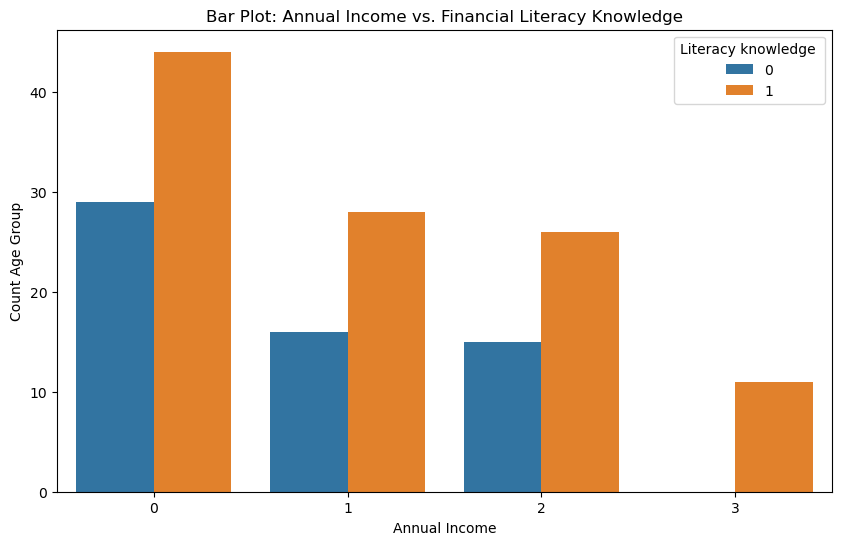

In [106]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Annual income (Parents/Self)', hue='Do you know anything about financial literacy (money management)', data=data1)
plt.xlabel('Annual Income')
plt.ylabel('Count Age Group')
plt.title('Bar Plot: Annual Income vs. Financial Literacy Knowledge')

plt.legend(title='Literacy knowledge ', loc='upper right')
plt.show()


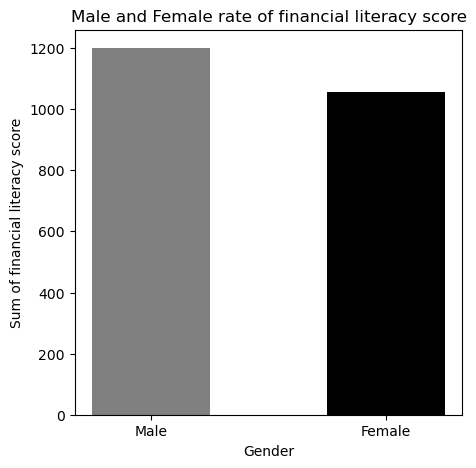

In [107]:
#Simple Bar graph for the Male and Female rate of financial literacy score
plt.figure(figsize=(5, 5))
x=["Male","Female"]
y=[1200,1057]
plt.bar(x,y,width=0.5,color=["grey","black"])
plt.xlabel("Gender")
plt.ylabel("Sum of financial literacy score")
plt.title("Male and Female rate of financial literacy score")
plt.show()

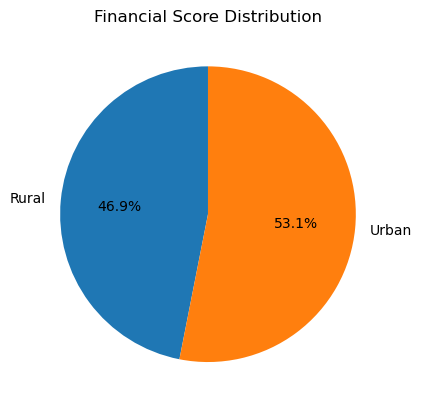

In [108]:
#Pie chart for Urban & Rural people proportion of financial literacy rates in data(Random Sampling for getting equal no. of data)
labels = ['Rural', 'Urban']
values = [803, 909]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Financial Score Distribution')
plt.show()

#### Correlation 

In [109]:
income_code = data1['Annual income (Parents/Self)']
insurance_knowledge_code = data1['How much percent of knowledge do you have about Insurance which protects your finances and investment?']

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(income_code, insurance_knowledge_code)

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.21415034134332384
P-value: 0.005177101933617933


<AxesSubplot:>

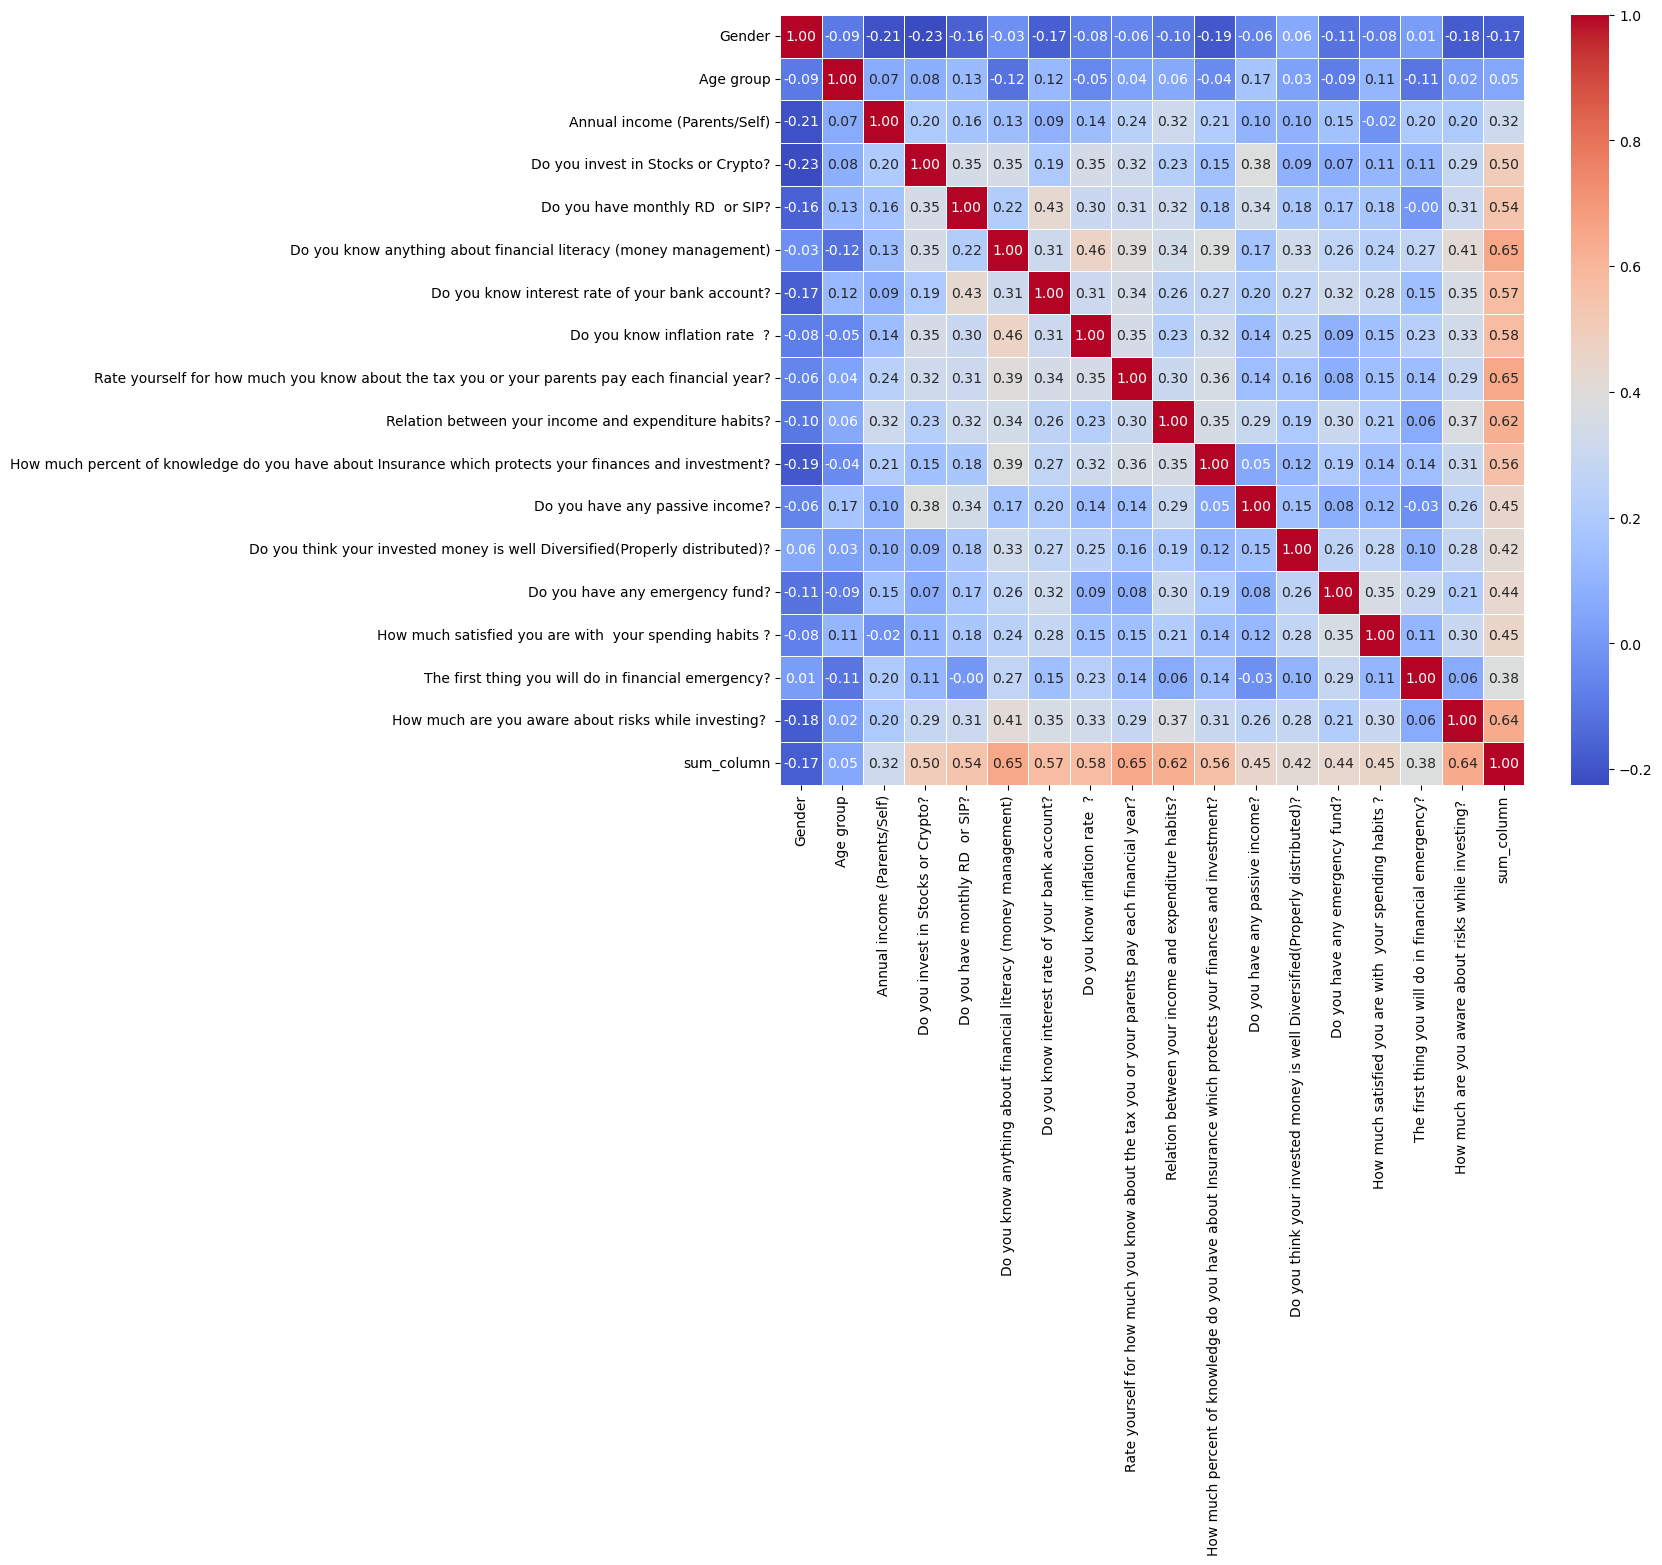

In [110]:
#Graphical Representation of the Correlation (Heatmap)
correlation_matrix = data1.corr()
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


#### Chi-Square Test

In [111]:
observed_data = np.array([15, 40, 18, 29, 18, 23, 23, 4])

chi2_stat, p_value = chisquare(observed_data)

print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi2 Statistic: 36.49411764705883
P-value: 5.8474593943586645e-06


### Spliting into Training and Testing

In [112]:
X=data1[['Gender','Age group','Annual income (Parents/Self)','Do you invest in Stocks or Crypto?', 'Do you have monthly RD  or SIP?', 'Do you know anything about financial literacy (money management)','Do you know interest rate of your bank account?','Do you know inflation rate  ?','Rate yourself for how much you know about the tax you or your parents pay each financial year?','Relation between your income and expenditure habits?','How much percent of knowledge do you have about Insurance which protects your finances and investment?','Do you have any passive income?','Do you think your invested money is well Diversified(Properly distributed)?','Do you have any emergency fund?','How much satisfied you are with  your spending habits ?','The first thing you will do in financial emergency?','How much are you aware about risks while investing? ']]
Y=data1['sum_column']

In [113]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25,random_state=21)

### Linear Regression Model

In [114]:
model = LinearRegression()

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print('Mean_absolute_error:',mae)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean_absolute_error: 3.3461605579400067e-15
Mean Squared Error: 1.6511042202300248e-29
R-squared: 1.0


### Decision Tree Regression model

In [115]:
dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(xtrain, ytrain)

y_pred = dt_regressor.predict(xtest)

mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print('Mean_absolute_error:',mae)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean_absolute_error: 3.116279069767442
Mean Squared Error: 15.395348837209303
R-squared: 0.5635387917816621


### Hyperparametric tuning for Decision Tree model

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)

#To define the hyperparameters and their potential values for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# Then create the Grid Search Cross-Validation object
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, scoring=scoring, refit='mse', cv=5, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_

# best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Best MSE on Cross-Validation:", grid_search.best_score_)
print("MSE on Test Set:", mse)
print("R-squared on Test Set:", r2)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE on Cross-Validation: 17.579670975523268
MSE on Test Set: 7.359272875816995
R-squared on Test Set: 0.8054891866281536


### Random Forest model

In [117]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(xtrain, ytrain)

y_pred = rf_regressor.predict(xtest)

mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print('Mean_absolute_error:',mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean_absolute_error: 1.6737209302325582
Mean Squared Error: 4.489323255813954
R-squared: 0.8727267908616989
